In [7]:
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.datasets import load_diabetes

# Load some sample data
data = load_diabetes()
X = data.data  # This is your original feature matrix

# Bin the first feature into 5 bins
kb = KBinsDiscretizer(n_bins=5, encode='onehot-dense', strategy='uniform')
X_binned = kb.fit_transform(X[:, [0]])  # bin only the first column

# Now combine original X with binned version
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)


(442, 15)


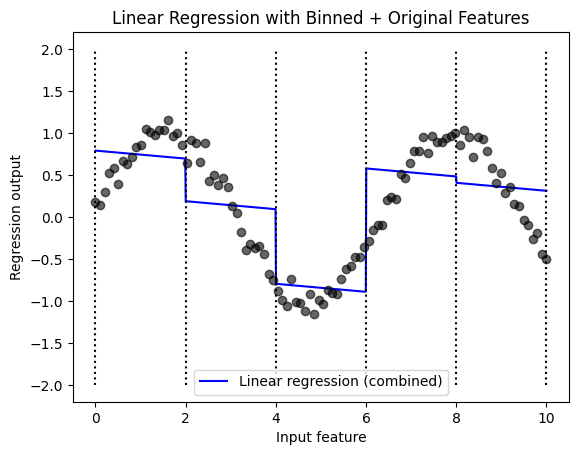

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import KBinsDiscretizer

# Generate synthetic data
np.random.seed(0)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Bin the feature
kb = KBinsDiscretizer(n_bins=5, encode='onehot-dense', strategy='uniform')
X_binned = kb.fit_transform(X)
X_combined = np.hstack([X, X_binned])

# Train model
reg = LinearRegression().fit(X_combined, y)

# Create line input for smooth plotting
line = np.linspace(0, 10, 1000).reshape(-1, 1)
line_binned = kb.transform(line)
line_combined = np.hstack([line, line_binned])

# Plot prediction
plt.plot(line, reg.predict(line_combined), label='Linear regression (combined)', color='blue')

# Plot bin boundaries
for bin_edge in kb.bin_edges_[0]:
    plt.plot([bin_edge, bin_edge], [-2, 2], ':', c='k')

# Plot original data
plt.plot(X[:, 0], y, 'o', c='k', alpha=0.6)
plt.xlabel("Input feature")
plt.ylabel("Regression output")
plt.legend()
plt.title("Linear Regression with Binned + Original Features")
plt.show()


In [17]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(100, 10)


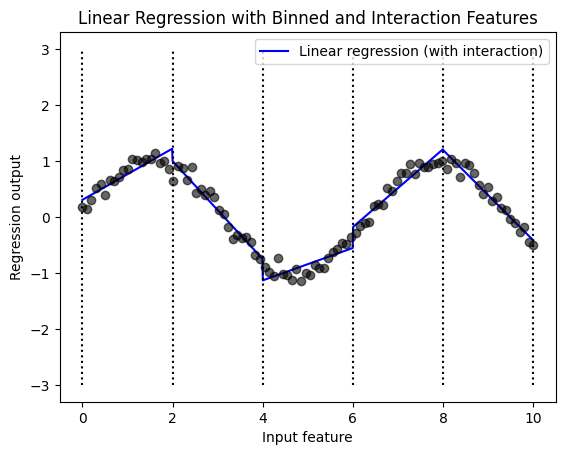

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import KBinsDiscretizer

# 1. Generate synthetic data
np.random.seed(0)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# 2. Create binned features
kb = KBinsDiscretizer(n_bins=5, encode='onehot-dense', strategy='uniform')
X_binned = kb.fit_transform(X)

# 3. Add interaction term: original * binned
X_product = np.hstack([X_binned, X * X_binned])

# 4. Train linear regression on interaction terms
reg = LinearRegression().fit(X_product, y)

# 5. Prepare prediction line
line = np.linspace(0, 10, 1000).reshape(-1, 1)
line_binned = kb.transform(line)
line_product = np.hstack([line_binned, line * line_binned])

# 6. Plot regression line
plt.plot(line, reg.predict(line_product), label='Linear regression (with interaction)', color='blue')

# 7. Plot bin boundaries
bins = kb.bin_edges_[0]
for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')

# 8. Plot original data
plt.plot(X[:, 0], y, 'o', c='k', alpha=0.6)

# 9. Final plot settings
plt.xlabel("Input feature")
plt.ylabel("Regression output")
plt.legend()
plt.title("Linear Regression with Binned and Interaction Features")
plt.show()


In [23]:
from sklearn.preprocessing import PolynomialFeatures
# include polynomials up to x ** 10:
# the default "include_bias=True" adds a feature that's constantly 1
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [25]:
print("X_poly.shape: {}".format(X_poly.shape))

X_poly.shape: (100, 10)


In [27]:
print("Entries of X:\n{}".format(X[:5]))
print("Entries of X_poly:\n{}".format(X_poly[:5]))

Entries of X:
[[0.       ]
 [0.1010101]
 [0.2020202]
 [0.3030303]
 [0.4040404]]
Entries of X_poly:
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.01010101e-01 1.02030405e-02 1.03061015e-03 1.04102036e-04
  1.05153571e-05 1.06215729e-06 1.07288615e-07 1.08372338e-08
  1.09467008e-09 1.10572736e-10]
 [2.02020202e-01 4.08121620e-02 8.24488122e-03 1.66563257e-03
  3.36491428e-04 6.79780663e-05 1.37329427e-05 2.77433186e-06
  5.60471082e-07 1.13226481e-07]
 [3.03030303e-01 9.18273646e-02 2.78264741e-02 8.43226488e-03
  2.55523178e-03 7.74312661e-04 2.34640200e-04 7.11030910e-05
  2.15463912e-05 6.52920946e-06]
 [4.04040404e-01 1.63248648e-01 6.59590497e-02 2.66501211e-02
  1.07677257e-02 4.35059624e-03 1.75781666e-03 7.10228955e-04
  2.86961194e-04 1.15943917e-04]]


In [31]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

X = np.array([[2, 3]])
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

print("Feature names:", poly.get_feature_names_out())


Feature names: ['x0' 'x1' 'x0^2' 'x0 x1' 'x1^2']


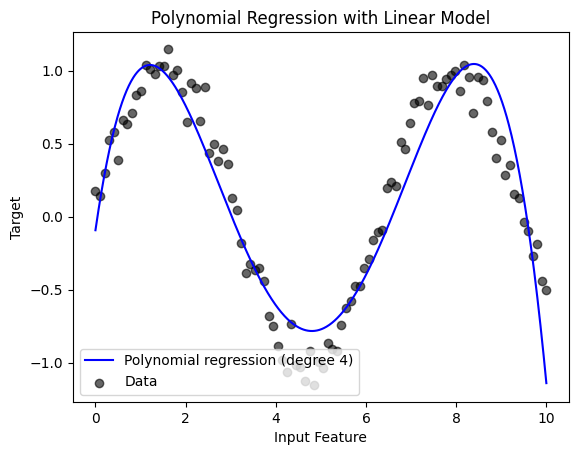

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 1. Generate synthetic data
np.random.seed(0)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# 2. Create polynomial features
poly = PolynomialFeatures(degree=4, include_bias=False)  # You can change degree
X_poly = poly.fit_transform(X)

# 3. Fit linear regression on polynomial features
reg = LinearRegression().fit(X_poly, y)

# 4. Generate input line for smooth curve
line = np.linspace(0, 10, 1000).reshape(-1, 1)
line_poly = poly.transform(line)

# 5. Plot predicted polynomial regression line
plt.plot(line, reg.predict(line_poly), label='Polynomial regression (degree 4)', color='blue')

# 6. Plot original data points
plt.scatter(X, y, color='black', alpha=0.6, label='Data')

# 7. Final plot settings
plt.xlabel("Input Feature")
plt.ylabel("Target")
plt.legend()
plt.title("Polynomial Regression with Linear Model")
plt.show()


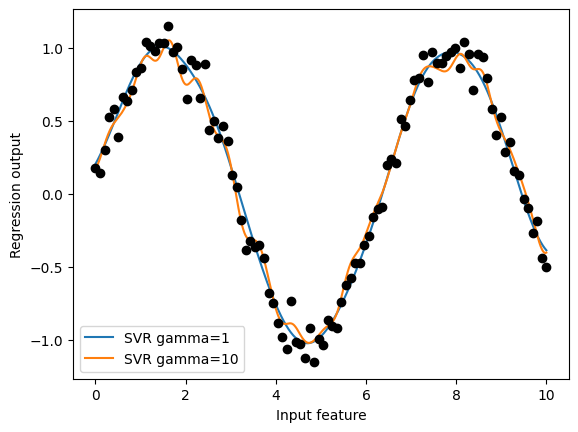

In [37]:
from sklearn.svm import SVR
for gamma in [1, 10]:
 svr = SVR(gamma=gamma).fit(X, y)
 plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")


MSE: 0.7052310761362042
R² Score: 0.4664820311380702


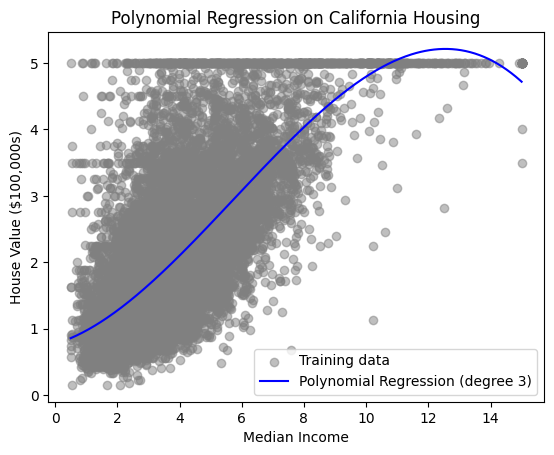

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load California housing dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# 2. Use only one feature for simple visualization (e.g., feature 0: MedInc)
X = X[:, [0]]  # Use median income

# 3. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 4. Polynomial transformation
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# 5. Fit linear regression
model = LinearRegression()
model.fit(X_train_poly, y_train)

# 6. Predict and evaluate
y_pred = model.predict(X_test_poly)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# 7. Plotting
X_plot = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)
y_plot = model.predict(X_plot_poly)

plt.scatter(X_train, y_train, color='gray', alpha=0.5, label='Training data')
plt.plot(X_plot, y_plot, color='blue', label='Polynomial Regression (degree 3)')
plt.xlabel("Median Income")
plt.ylabel("House Value ($100,000s)")
plt.title("Polynomial Regression on California Housing")
plt.legend()
plt.show()


In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)


In [55]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Show feature names (if X is a NumPy array)
print("Polynomial feature names:\n", poly.get_feature_names_out())



Polynomial feature names:
 ['1' 'x0' 'x0^2']


In [57]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(
 ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(
 ridge.score(X_test_poly, y_test)))

Score without interactions: 0.451
Score with interactions: 0.458


In [59]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(
 rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(rf.score(X_test_poly, y_test)))


Score without interactions: 0.280
Score with interactions: 0.277


In [61]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)
X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

In [63]:
print("Number of feature appearances:\n{}".format(np.bincount(X[:, 0])))

Number of feature appearances:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
